In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import imageio
import scipy.io as spio
import cv2
from numpy import sqrt, pi, exp, transpose, matmul
from numpy.linalg import det, inv
from scipy.stats import norm 
from scipy.stats import multivariate_normal
import time
import sys
from scipy.spatial import Delaunay
import matplotlib.image as mpimg
import dlib

%matplotlib inline
plt.style.use('default')

Step 0: Read images

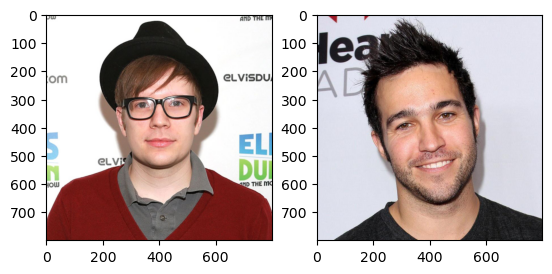

In [2]:
# the follow images are members of my favourite band Fall Out Boy
image = cv2.imread("Orifaces\\patrick.jpg")
image1 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.imread("Orifaces\\pete.jpg")
image2 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.subplot(1, 2, 1)
plt.imshow(image1)
plt.subplot(1, 2, 2)
plt.imshow(image2)

Step 1: Find some corresponding face landmarks between start and end images and display them

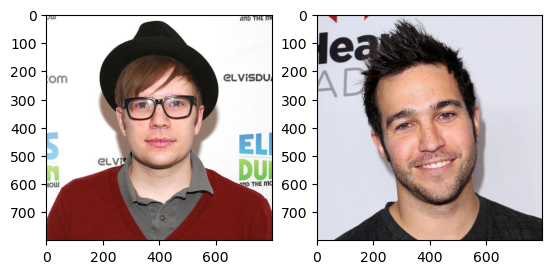

In [3]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

def get_landmarks(image):
    landmarks = []
    detections = detector(image, 1)
    for k, d in enumerate(detections):
        shape = predictor(image, d)
        for i in range(0, 68):
            x = shape.part(i).x
            y = shape.part(i).y
            landmarks.append((x, y))
            # draw landmarks point on image
            cv2.circle(image, (x, y), 1, (0, 0, 255), -1)
    return landmarks, image

landmarks1, image1_with_landmarks = get_landmarks(image1)
landmarks2, image2_with_landmarks = get_landmarks(image2)

plt.subplot(1, 2, 1)
plt.imshow(image1_with_landmarks)
plt.subplot(1, 2, 2)
plt.imshow(image2_with_landmarks)

Step 2:  Create a triangulation and visualise it.

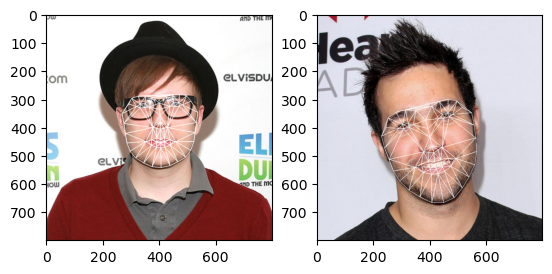

In [5]:
# a Delaunay triangulation (DT), also known as a Delone triangulation, for a given set {pi} of discrete points pi in general position is a triangulation 
# such that no point pi is inside the circumcircle of any triangle in the DT.
def draw_delaunay(img, points, color=(255, 255, 255)):
    # create a Delaunay triangulation
    delaunay = Delaunay(points)
    
    # draw the triangles
    for simplex in delaunay.simplices:
        pt1 = points[simplex[0]]
        pt2 = points[simplex[1]]
        pt3 = points[simplex[2]]
        cv2.line(img, pt1, pt2, color, 1, cv2.LINE_AA, 0)
        cv2.line(img, pt2, pt3, color, 1, cv2.LINE_AA, 0)
        cv2.line(img, pt3, pt1, color, 1, cv2.LINE_AA, 0)

    return delaunay


# Convert landmarks to a 2-D numpy array
points1 = np.array(landmarks1, dtype=np.int32)
points2 = np.array(landmarks2, dtype=np.int32)

# Draw Delaunay triangles
delaunay_triangles1 = draw_delaunay(image1, points1)
delaunay_triangles2 = draw_delaunay(image2, points2)

plt.subplot(1, 2, 1)
plt.imshow(image1)
plt.subplot(1, 2, 2)
plt.imshow(image2)

# Extract the list of triangle vertices
triangle_vertices1 = delaunay_triangles1.simplices.copy()
triangle_vertices2 = delaunay_triangles2.simplices.copy()

Step3: Create the intermediate image coordinates